# Download weights

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from utils.utils_stylegan2 import convert_images_to_uint8

In [2]:
def plot_images(gen, seed):
    """ plot images from generator output """
    # creating random latent vector
    rnd = np.random.RandomState(seed)
    z = rnd.randn(3, 512).astype('float32')

    # running network
    out = gen(z)

    print('image shape: ', out.shape)

    #converting image/s to uint8
    img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)

    #plotting images
    fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,15))
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')
    img_plot = ax1.imshow(img.numpy()[0])
    img_plot = ax2.imshow(img.numpy()[1])
    img_plot = ax3.imshow(img.numpy()[2])

### Machine configuration

In [3]:
impl = 'cuda' # 'ref' if cuda is not available in your machine
gpu = True # False if tensorflow cpu is used

# Load stylegan2 generator

In [4]:
from stylegan2_generator import StyleGan2Generator

#### Loading ffhq stylegan2

Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
Loaded ffhq generator weights!
image shape:  (3, 3, 1024, 1024)


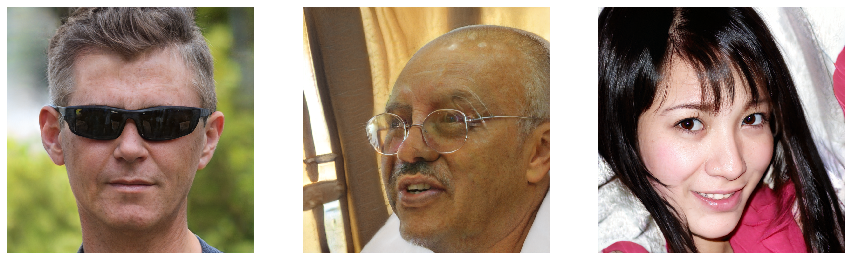

In [5]:
weights_name = 'ffhq' # face model trained by Nvidia

# instantiating generator network
generator = StyleGan2Generator(weights=weights_name, impl=impl, gpu=gpu)

plot_images(generator, seed=96)

#### Loading car stylegan2

Loaded car generator weights!
image shape:  (3, 3, 512, 512)


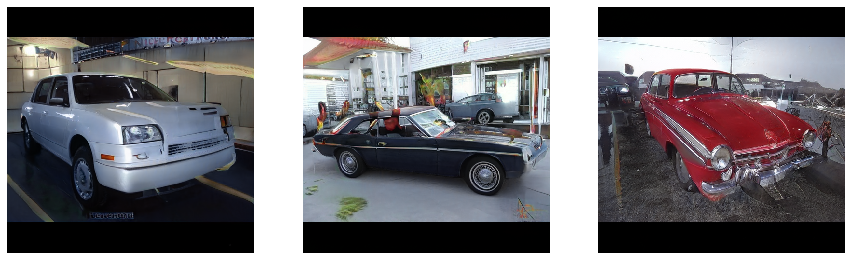

In [6]:
weights_name = 'car' # church model trained by Nvidia

# instantiating generator network
generator = StyleGan2Generator(weights=weights_name, impl=impl, gpu=gpu)

plot_images(generator, seed=4)

#### Loading cat stylegan2

Loaded cat generator weights!
image shape:  (3, 3, 256, 256)


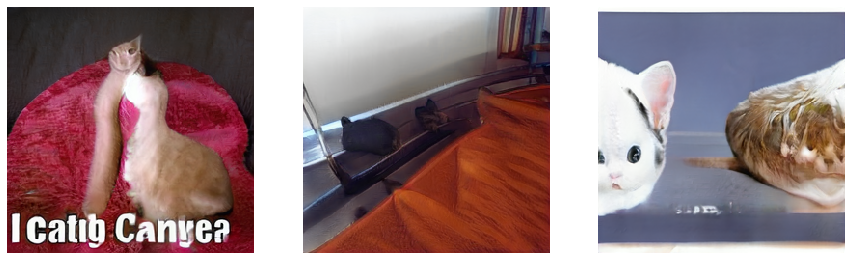

In [7]:
weights_name = 'cat' # church model trained by Nvidia

# instantiating generator network
generator = StyleGan2Generator(weights=weights_name, impl=impl, gpu=gpu)

plot_images(generator, seed=6)

#looks like the training was made also using cat memes :')

#### Loading church stylegan2

Loaded church generator weights!
image shape:  (3, 3, 256, 256)


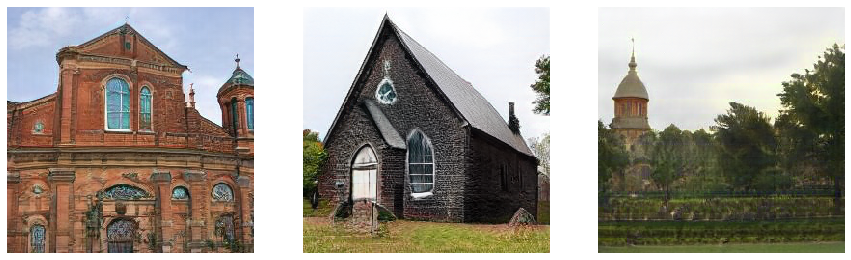

In [8]:
weights_name = 'church' # church model trained by Nvidia

# instantiating generator network
generator = StyleGan2Generator(weights=weights_name, impl=impl, gpu=gpu)

plot_images(generator, seed=1)

#### Loading horse stylegan2

Loaded horse generator weights!
image shape:  (3, 3, 256, 256)


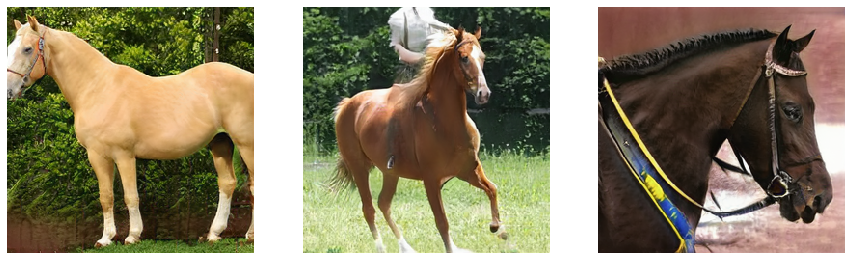

In [9]:
weights_name = 'horse' # church model trained by Nvidia

# instantiating generator network
generator = StyleGan2Generator(weights=weights_name, impl=impl, gpu=gpu)

plot_images(generator, seed=0)

#### Create new stylegan2

image shape:  (3, 3, 512, 512)


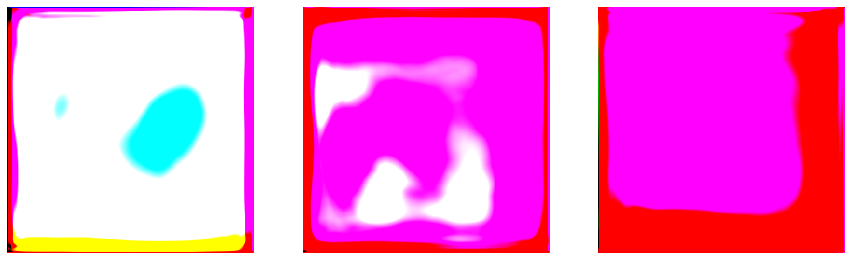

In [10]:
resolution = 512 # output resolution, square image power of 2

# instantiating generator network
generator = StyleGan2Generator(resolution=resolution, impl=impl, gpu=gpu)

plot_images(generator, seed=10)

# Load stylegan2 entire model

In [11]:
from stylegan2 import StyleGan2

Loaded horse generator weights!
Loaded horse discriminator weights!
tf.Tensor(
[[-0.22971869]
 [-0.48247623]
 [-0.34916365]], shape=(3, 1), dtype=float32)
image shape:  (3, 3, 256, 256)


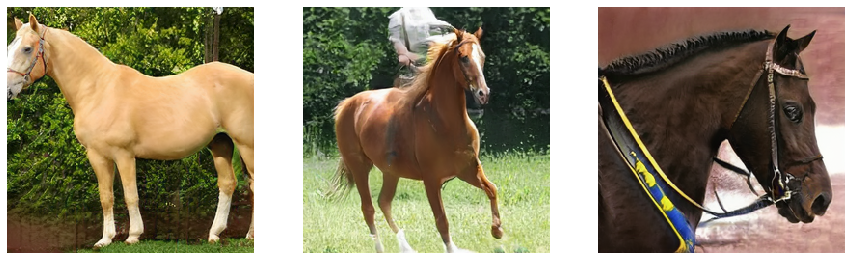

In [12]:
weights_name = 'horse' # church model trained by Nvidia

# instantiating stylegan2 model, generator and discriminator
model = StyleGan2(weights=weights_name, impl=impl, gpu=gpu)

seed = 0
#getting random latent vectors
rnd = np.random.RandomState(seed)
z = rnd.randn(3, 512).astype('float32')

# getting generator output
out_image = model.generator(z)

# getting discriminator output
score = model.discriminator(out_image)

#scores
print(score)

#plot images
plot_images(model.generator, seed=seed)